<h1> Which populations are at risk of contracting COVID-19? </h1>

<h3> Task Details </h3>
The Roche Data Science Coalition is a group of like-minded public and private organizations with a common mission and vision to bring actionable intelligence to patients, frontline healthcare providers, institutions, supply chains, and government. The tasks associated with this dataset were developed and evaluated by global frontline healthcare providers, hospitals, suppliers, and policy makers. They represent key research questions where insights developed by the Kaggle community can be most impactful in the areas of at-risk population evaluation and capacity management. - COVID19 Uncover Challenge



<h3> Importing the Essential Libraries </h3>

In [1]:
import pandas as pd                #Pandas library for data analysis
import numpy as np                 #For numerical analysis of data
import matplotlib.pyplot as plt    #Python's plotting 


import plotly.express as px       #Plotly for plotting the COVID-19 Spread.
import plotly.offline as py       #Plotly for plotting the COVID-19 Spread.
import seaborn as sns             #Seaborn for data plotting
import plotly.graph_objects as go #Plotlygo for plotting


import glob                       #For assigning the path
import os                         #OS Library for implementing the functions.

import warnings
warnings.filterwarnings('ignore') #Library to ignore warnings.

<h3> What we actually know? </h3>

It is a genral trend seen that patients who belong to an elderly age group has higher chances of getting into a COVID-19 infection than that of the younger people. [-Reports ABC News](https://abcnews.go.com/Health/risk-severe-covid-19-increases-decade-age/story?id=69914642)

The datasets mentioned under this challenge takes data from Worldometer which possess the similar figures for the age-group wise distribution of COVID-19 Cases. The figures mentioned there also highlights that people associated with an already exiisting COPD's or medical ailments have a higher risk of getting into a COVID-19 infection -[See here](http://https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/)

We can analysis multiple datasets to understand this fact much better. 



<h3> Reading the Files and Datasets </h3>

1. We read the Novel-Corona-Virus-2019-dataset managed by SRK into this notebook. The dataset hold s information about the cumulative case counts of COVID-19 Across the world. The dataset can be viewed and downloaded from - [here](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

2. The dataset created by me (Available at https://www.kaggle.com/aestheteaman01/covcsd-covid19-countries-statistical-dataset) is loaded here. The information for the dataset can be seen at the description section for the dataset

In [2]:
#Reading the cumulative cases dataset
covid_cases = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

#Viewing the dataset
covid_cases.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


<h3> Further Analysis for the dataset </h3>

The following are the procedures taken into consideration.

1. We group the dataset Country wise 
2. Data for country for which we waana check is later fetched from the main dataset generated.

In [3]:
#Groping the same cities and countries together along with their successive dates.

country_list = covid_cases['Country/Region'].unique()

country_grouped_covid = covid_cases[0:1]

for country in country_list:
    test_data = covid_cases['Country/Region'] == country   
    test_data = covid_cases[test_data]
    country_grouped_covid = pd.concat([country_grouped_covid, test_data], axis=0)
    
country_grouped_covid.reset_index(drop=True)
country_grouped_covid.head()

#Dropping of the column Last Update
country_grouped_covid.drop('Last Update', axis=1, inplace=True)

#Replacing NaN Values in Province/State with a string "Not Reported"
country_grouped_covid['Province/State'].replace(np.nan, "Not Reported", inplace=True)

#Printing the dataset
country_grouped_covid.head()

#country_grouped_covid holds the dataset for the country

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
0,1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0


In [4]:
#Creating a dataset to analyze the cases country wise - As of 04/02/2020

latest_data = country_grouped_covid['ObservationDate'] == '04/02/2020'
country_data = country_grouped_covid[latest_data]

#The total number of reported Countries
country_list = country_data['Country/Region'].unique()
print("The total number of countries with COVID-19 Confirmed cases = {}".format(country_list.size))
    

The total number of countries with COVID-19 Confirmed cases = 183


<h3> Plotting a Running Map for observing the spread of COVID-19 Confirmed Cases </h3>


In [5]:
#Creating the interactive map
py.init_notebook_mode(connected=True)

#GroupingBy the dataset for the map
formated_gdf = covid_cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['ObservationDate'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')

formated_gdf['log_ConfirmedCases'] = np.log(formated_gdf.Confirmed + 1)
formated_gdf['log_Fatalities'] = np.log(formated_gdf.Deaths + 1)

#Plotting the figure


fig = px.choropleth(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="log_ConfirmedCases", hover_name="Country/Region",projection="mercator",
                     animation_frame="Date",width=1000, height=800,
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title='The Spread of COVID-19 Cases Across World')

#Showing the figure
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)


<h3> Plotting a Running Map for observing the spread of COVID-19 Deaths </h3>


In [6]:
#Creating the interactive map
py.init_notebook_mode(connected=True)

#GroupingBy the dataset for the map
formated_gdf = covid_cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['ObservationDate'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')

formated_gdf['log_ConfirmedCases'] = np.log(formated_gdf.Confirmed + 1)
formated_gdf['log_Fatalities'] = np.log(formated_gdf.Deaths + 1)

#Plotting the figure


fig = px.choropleth(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="log_Fatalities", hover_name="Country/Region",projection="mercator",
                     animation_frame="Date",width=1000, height=800,
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title='The Deaths because of COVID-19 Cases')

#Showing the figure
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)


<h3> General Observations from the above Choreopleth Graphs </h3>

1. The cases of COVID-19 starts from China as the epicenter with first initial COVID-19 Cases reported in Australia, US, Canada.

2. Gradually cases in China increases and the confirmed cases is more than anywhere else in the world.

3. Europe emerges later as the new epicenter for the virus, where there is a rapid rise in COVID-19 Cases in European Countries. This outbreak occurs where the confirmed number of COVID-19 Cases in China saturates.

4. The confirmed cases of COVID-19 gradually spreads throughout the world, with spike in confirmed cases seen in European regions and US.

5. As of April 3rd 2020, USA has the highest number of confimed COVID-19 Cases reported, with some European Countries emerging as the 2nd-4th highest cases of COVID-19

<h3> Analysis by bar charts </h3>

In [7]:
#Plotting a bar graph for confirmed cases vs deaths due to COVID-19 in World.

unique_dates = country_grouped_covid['ObservationDate'].unique()
confirmed_cases = []
recovered = []
deaths = []

for date in unique_dates:
    date_wise = country_grouped_covid['ObservationDate'] == date  
    test_data = country_grouped_covid[date_wise]
    
    confirmed_cases.append(test_data['Confirmed'].sum())
    deaths.append(test_data['Deaths'].sum())
    recovered.append(test_data['Recovered'].sum())
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Date' : unique_dates, 'Confirmed' : confirmed_cases, 'Recovered' : recovered, 'Deaths' : deaths}
country_dataset = pd.DataFrame(country_dataset)

#Plotting the Graph of Cases vs Deaths Globally.

fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Confirmed'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Deaths'],name='Total Deaths because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Deaths from COVID-19',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()


fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Confirmed'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Recovered'],name='Total Recoveries because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Recoveries from COVID-19',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),
    barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()

<H3> Analyses from the bar chart </H3>

From the Graph of Confirmed Cases vs Deaths we observe the following trends.

1. On March 17th 2020, 56 Days post the first confirmed case of COVID-19. The Global Count of confirmed covid-19 cases crossed 200k mark.
2. Within 7 days, on 24th March 2020, the Global confirmed case count reached beyond 400k mark.
3. It took 3 days from March 24th 2020 to March 27th 2020, for global confirmed case count to reach 600k mark.
4. The same trends were observed of 3 days. On April 2, 2020 1m mark of COVID-19 was crossed.
5. Within the next 2 days, 200k more confirmed cases was added.

The total cumber of recovered cases was far more less than the confirmed cases. A total of 20.55% cases were recovered out of total confirmed cases as of April 6th 2020.

<h3> Using the datasets mentioned for the competition </h3>

1. We use the datasets uploaded in this notebook to fetch out the important population parameters of the country. 


In [8]:
#Generating a function to concatenate all of the files available.

folder_name = '../input/covcsd-covid19-countries-statistical-dataset'
file_type = 'csv'
seperator =','
dataframe = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)],ignore_index=True,sort=False)

In [9]:
#Selecting the columns that are required as is essential for the data-wrangling task

covid_data = dataframe[['Date', 'State', 'Country', 'Cumulative_cases', 'Cumulative_death',
       'Daily_cases', 'Daily_death', 'Latitude', 'Longitude', 'Temperature',
       'Min_temperature', 'Max_temperature', 'Wind_speed', 'Precipitation',
       'Fog_Presence', 'Population', 'Population Density/km', 'Median_Age',
       'Sex_Ratio', 'Age%_65+', 'Hospital Beds/1000', 'Available Beds/1000',
       'Confirmed Cases/1000', 'Lung Patients (F)', 'Lung Patients (M)',
       'Life Expectancy (M)', 'Life Expectancy (F)', 'Total_tests_conducted',
       'Out_Travels (mill.)', 'In_travels(mill.)', 'Domestic_Travels (mill.)']]

<h3> A little editing with the dataset </h3>

In [10]:
#Filtering of the dataset to view the latest contents (as of 30-03-2020)
latest_data = covid_data['Date'] == '30-03-2020'
country_data_detailed = covid_data[latest_data]

#Dropping off unecssary columns from the country_data_detailed dataset
country_data_detailed.drop(['Daily_cases','Daily_death','Latitude','Longitude'],axis=1,inplace=True)

#Viewing the dataset
country_data_detailed.head(3)

,Date,State,Country,Cumulative_cases,Cumulative_death,Temperature,Min_temperature,Max_temperature,Wind_speed,Precipitation,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
68,30-03-2020,NaN,Kuwait,266.0,0.0,23.44,17.72,29.28,5.9,0.0,...,0.500,0.062287,7.44,13.43,76.9,79.8,120000,Not Reported,8.508,Not Reported
137,30-03-2020,NaN,Afghanistan,170.0,4.0,6.17,0.28,11.61,6.1,0.0,...,0.210,0.004367,36.31,39.33,63.2,63.6,1019,1.5616,Not Reported,Not Reported
208,30-03-2020,NaN,Israel,4695.0,16.0,16.22,9.72,22.72,999.9,0.0,...,0.775,0.542427,12.81,20.23,80.8,84.7,82692,NaN,4.121,NaN


In [11]:
#Replacing the text Not Reported and N/A with numpy missing value cmputation

country_data_detailed.replace('Not Reported',np.nan,inplace=True)
country_data_detailed.replace('N/A',np.nan,inplace=True)


#Viewing the dataset
country_data_detailed.head(3)

,Date,State,Country,Cumulative_cases,Cumulative_death,Temperature,Min_temperature,Max_temperature,Wind_speed,Precipitation,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
68,30-03-2020,NaN,Kuwait,266.0,0.0,23.44,17.72,29.28,5.9,0.0,...,0.500,0.062287,7.44,13.43,76.9,79.8,120000,NaN,8.508,NaN
137,30-03-2020,NaN,Afghanistan,170.0,4.0,6.17,0.28,11.61,6.1,0.0,...,0.210,0.004367,36.31,39.33,63.2,63.6,1019,1.5616,NaN,NaN
208,30-03-2020,NaN,Israel,4695.0,16.0,16.22,9.72,22.72,999.9,0.0,...,0.775,0.542427,12.81,20.23,80.8,84.7,82692,NaN,4.121,NaN


In [12]:
#Converting the datatypes

country_data_detailed['Lung Patients (F)'].replace('Not reported',np.nan,inplace=True)
country_data_detailed['Lung Patients (F)'] = country_data_detailed['Lung Patients (F)'].astype("float")

<H3> Understanding the dataset generated above </H3>

The dataset holds information about:

1. The name of the country
2. Total deaths and cases reported from COVID-19 as of March 30th 2020
3. Latitude and Longitude of the country
4. Other demographics

In [13]:
#Getting the dataset to check the correlation 
corr_data = country_data_detailed.drop(['Date','State','Country','Min_temperature','Max_temperature','Out_Travels (mill.)',
                                        'In_travels(mill.)','Domestic_Travels (mill.)','Total_tests_conducted','Age%_65+'], axis=1)

#Converting the dataset to the correlation function
corr = corr_data.corr()

<h3> Plotting a heatmap to view the details for the dataset </h3>

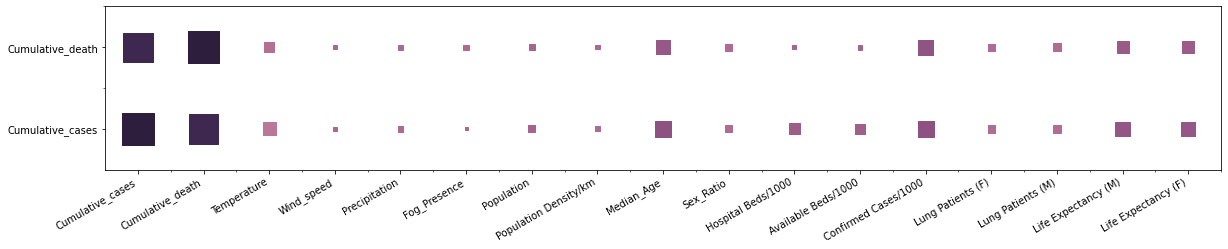

In [14]:
#Plotting a heatmap

def heatmap(x, y, size,color):
    fig, ax = plt.subplots(figsize=(20,3))
    
    # Mapping from column names to integer coordinates
    x_labels = corr_data.columns
    y_labels = ['Cumulative_cases', 'Cumulative_death']
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.cubehelix_palette(n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]

    
    ax.scatter(
    x=x.map(x_to_num),
    y=y.map(y_to_num),
    s=size * 1000,
    c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
    marker='s'
)
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=30, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
corr = pd.melt(corr.reset_index(), id_vars='index') 
corr.columns = ['x', 'y', 'value']
heatmap(x=corr['x'],y=corr['y'],size=corr['value'].abs(),color=corr['value'])

In [15]:
#Creating a correlation matrix

matrix = corr_data.corr()
print(matrix)

                       Cumulative_cases  Cumulative_death  Temperature  \
Cumulative_cases               1.000000          0.864749    -0.176452   
Cumulative_death               0.864749          1.000000    -0.094223   
Temperature                   -0.176452         -0.094223     1.000000   
Wind_speed                    -0.012863         -0.017474    -0.007298   
Precipitation                 -0.030839         -0.020087     0.006486   
Fog_Presence                   0.008276         -0.028783    -0.145397   
Population                     0.049479          0.030890     0.186334   
Population Density/km         -0.028253         -0.019015    -0.041675   
Median_Age                     0.249196          0.183435    -0.512779   
Sex_Ratio                     -0.046893         -0.048905     0.216392   
Hospital Beds/1000             0.121463          0.016645    -0.430989   
Available Beds/1000            0.098001          0.024119    -0.320425   
Confirmed Cases/1000           0.24764

<h3> Initial Analysis from the datasets </h3>

With a weak correlation we observe the following trends

1. With the rise in tempertaure, the confirmed cases tend to slow down (negative correlation). However substantial proof needs to be added here. For the sake of this in the upcoming versions of the notebook I'll analyze the trends for all the days to check the temperature.

2. Median age tends to affect the cases. So for a higher median age of the country cases tends to increase.

3. Life expectancy also seems to affect the COVID-19 confirmed cases with a weak correlation. The effect is seen more prominent in males than in females.

We keep forward to look with more dataset to analyze the correlation as since the correaltions obtained here are too weak.

<h3> The next big steps </h3>

This notebook would be regular updated by me to check for much newer and diverse data to analyze more trends in spread of COVID-19 and understand it through the terms of population demographics.

Contact
LinkedIn - https://www.linkedin.com/in/amankumar01/